In [16]:
from sklearn.datasets import *
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [7]:
digit = load_digits()
dig = pd.DataFrame(digit['data'][0:1700])

In [9]:
dig.shape

(1700, 64)

In [5]:
print(dig.head())

    0    1    2     3     4     5    6    7    8    9   ...   54   55   56   
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  \
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]


In [13]:
print(digit.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


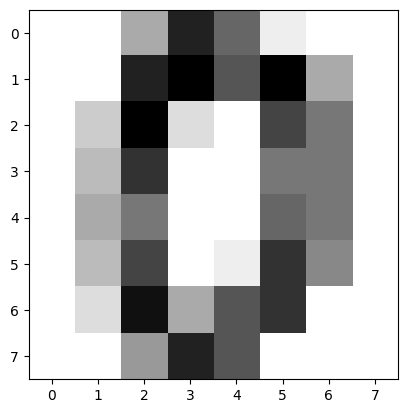

In [28]:
plt.imshow(digit['images'][0], cmap=plt.cm.gray_r)
plt.show()

In [30]:
train_x = digit.data 
train_y = digit.target 
x_train,x_test,y_train,y_test= train_test_split(train_x,train_y,test_size=0.25,random_state=0)

In [33]:
KNN = KNeighborsClassifier(n_neighbors=7) 
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [34]:
print(KNN.score(x_test, y_test))

0.9777777777777777


In [38]:
ks = range(1,100)
scores = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    scores.append(knn.score(x_test,y_test))

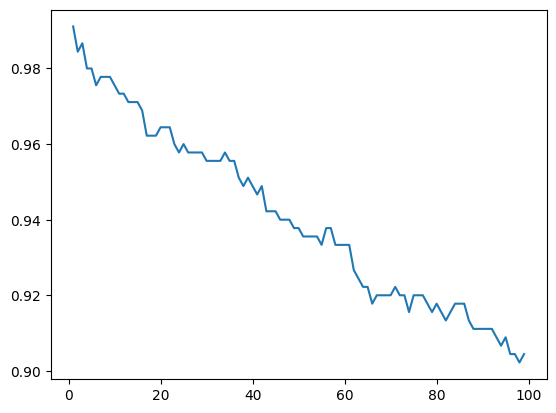

In [39]:
plt.plot(ks,scores)

In [40]:
#====================================================================================================

In [41]:
from scipy import stats

In [42]:
df = pd.read_csv("./datasets/univariateLinearRegression.csv")

In [45]:
df.shape

(96, 2)

In [44]:
X = df.iloc[:,0]
Y = df.iloc[:,1]

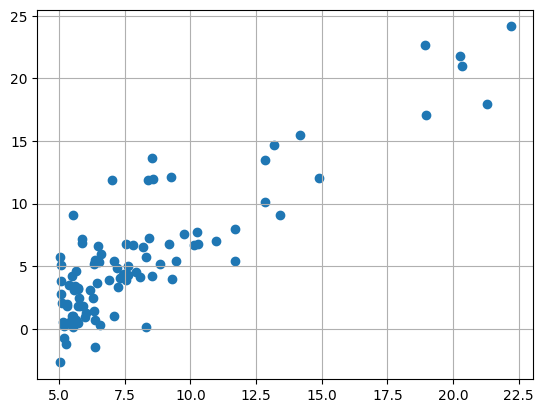

In [46]:
ax = plt.axes()
ax.grid()
plt.scatter(X,Y)
plt.show()

In [47]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

In [48]:
def F(x):
    return slope * x + intercept

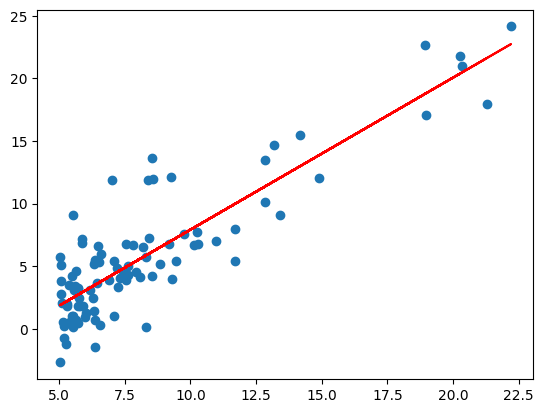

In [49]:
fitLine = F(X)
plt.scatter(X, Y)
plt.plot(X, fitLine, c='r')
plt.show()

In [50]:
F(20.27)

20.38709883129834

In [51]:
#====================================================================================================

In [54]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [59]:
df = pd.read_excel("./datasets/MultivariateLinearRegression.xlsx")

In [60]:
df.head()

,taille_en_pieds_carre,nb_chambres,prix
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [63]:
X = df.iloc[:,0:2]
Y = df.iloc[:,2]

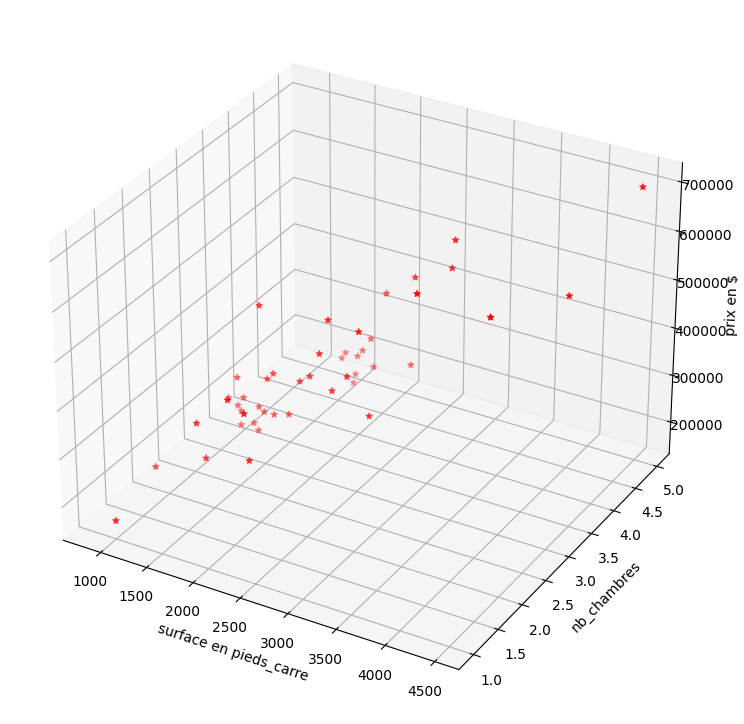

In [69]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
fig = plt.figure()
ax = fig.add_subplot(1,2,1, projection='3d')
ax.scatter(X.iloc[:,0],X.iloc[:,1],Y,c='r',marker='*')
ax.set_xlabel('surface en pieds_carre')
ax.set_ylabel('nb_chambres')
ax.set_zlabel('prix en $')
plt.show()

In [70]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

In [122]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     272.9
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           3.25e-50
Time:                        17:50:50   Log-Likelihood:                 16.240
No. Observations:                 150   AIC:                            -26.48
Df Residuals:                     147   BIC:                            -17.45
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2247      0.191      1.175      0.2

In [91]:
def predict_price_of_house(surface, nb_chambres):
    return 140.8611*surface + 1.698e+04*nb_chambres 

In [92]:
print(predict_price_of_house(4500, 5))

718774.95


In [78]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [95]:
iris = datasets.load_iris()

In [96]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [104]:
X = pd.DataFrame(iris['data'])

In [105]:
X = X.iloc[:,0:2]
Y = iris['target'] 

In [106]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [107]:
for i in range(len(Y)) :
    if Y[i] == 2 :
        Y[i] = 1
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


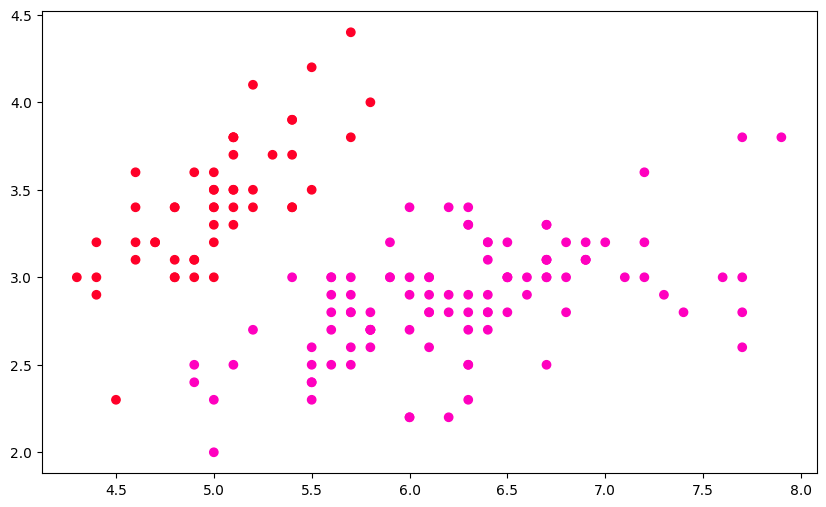

In [116]:
#VISUALISATION PAR CLASSE 
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=Y, cmap='gist_rainbow')

In [117]:
model = LogisticRegression(C=1e20)
model.fit(X, Y)

LogisticRegression(C=1e+20)

In [118]:
#PREDICTION
Iries_to_predict = [
    [5.1, 3.5],
    [6.2, 3.2],
    [4.3, 3.1]                    
]

In [121]:
print(model.predict(Iries_to_predict))

[0 1 0]
